# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [ ]:
# If on colab, uncomment the following lines

! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

--2022-12-31 11:33:12--  https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58374 (57K) [text/plain]
Saving to: ‘car_data.csv.1’

car_data.csv.1      100%[===================>]  57.01K  --.-KB/s    in 0.01s   

2022-12-31 11:33:12 (5.04 MB/s) - ‘car_data.csv.1’ saved [58374/58374]



In [ ]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

! pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Просто для удобства собрала все импорты в начале файла.

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

import scikitplot as skplt

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [ ]:
dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [ ]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,186,91,42,81,193,69,5,169,38,20,137,184,434,156,68,3,23,198,204
1,159,91,45,75,154,57,6,150,44,19,146,170,335,180,66,16,2,193,198
2,133,98,39,68,121,49,7,134,51,18,142,164,261,134,75,4,1,186,186
3,669,85,44,66,125,58,6,148,45,19,145,170,323,185,84,8,1,180,183
4,271,93,47,88,200,66,7,173,38,21,151,197,452,205,66,0,3,195,202
5,366,90,47,85,149,60,10,155,43,19,155,179,355,186,75,1,5,185,196
6,181,78,36,60,116,56,6,123,55,17,124,141,221,121,78,3,16,178,185
7,286,83,41,70,155,65,7,144,46,19,141,168,309,147,71,4,12,188,195
8,174,93,48,84,150,63,11,156,44,20,165,171,354,188,73,8,15,185,195
9,272,91,43,88,157,61,9,149,45,19,157,165,326,140,64,1,26,197,207


Methods `describe` and `info` deliver some useful information.

In [ ]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,424.335155,93.826958,45.167577,82.613843,169.888889,61.779599,8.715847,170.408015,40.579235,20.714026,148.635701,190.380692,448.178506,176.559199,72.832423,6.300546,12.628415,188.714026,195.424408
std,244.314975,8.155264,6.199332,15.823164,34.283017,8.788713,5.253722,33.693623,7.849846,2.636805,14.624069,32.033156,179.954964,32.614686,8.042381,4.727117,9.008329,6.095065,7.456701
min,0.000000,76.000000,33.000000,40.000000,104.000000,47.000000,3.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,206.000000,88.000000,40.000000,70.000000,141.000000,57.000000,7.000000,148.000000,33.000000,19.000000,138.000000,168.000000,322.000000,151.000000,68.000000,3.000000,6.000000,184.000000,190.000000
50%,420.000000,93.000000,45.000000,80.000000,169.000000,61.000000,8.000000,159.000000,42.000000,20.000000,147.000000,180.000000,369.000000,176.000000,72.000000,6.000000,11.000000,188.000000,196.000000
75%,635.000000,100.000000,50.000000,98.000000,197.000000,65.000000,10.000000,200.000000,46.000000,23.000000,160.000000,218.000000,600.000000,200.000000,76.000000,9.000000,19.000000,193.000000,201.000000
max,845.000000,119.000000,59.000000,110.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,264.000000,135.000000,22.000000,41.000000,204.000000,211.000000


In [ ]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

Для начала посмотрим на то, какие значения лейблов лежат в нашей целевой переменной и при необходимости трансформируем.

In [ ]:
pd.unique(y_train)

array(['bus', 'opel', 'van', 'saab'], dtype=object)

Мы видим 4 различных значений лейблов, но они в текстовом формате. Было бы лучше сконвертировать их в числовой формат.

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

Теперь можно посмотреть на сам датасет. Мы можем заметить, что все колонки не содержат Null values, то есть нам не нужно ничего заполнять/убирать в датасете.

Все колонки имеют тип Integer, но при этом у всех колонок разный диапазон значений. Для того, чтобы модели показывали лучший результат, отнормируем значения, вычтя среднее и поделив на дисперсию, для каждой колонки данных. Это необходимо в том числе и потому, что далее мы будем применеять PCA, а его следует проводить на отнормированных данных.

In [ ]:
sc = preprocessing.StandardScaler()
x_train_sc = sc.fit_transform(X_train)
x_test_sc = sc.transform(X_test)                            

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [ ]:
grid={"C": np.linspace(0.1, 1, 10), "penalty":["l1","l2"]} # l1 lasso l2 ridge
logreg=LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)
logreg_cv=GridSearchCV(logreg, grid, cv=10)
logreg_cv.fit(x_train_sc, y_train)

GridSearchCV(cv=10,
             estimator=LogisticRegression(max_iter=500,
                                          multi_class='multinomial',
                                          solver='saga', tol=0.001),
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'penalty': ['l1', 'l2']})

In [ ]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'penalty': 'l1'}
accuracy : 0.7778451178451179


In [ ]:
logreg_best = LogisticRegression(**logreg_cv.best_params_, multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)
logreg_best.fit(x_train_sc, y_train)

LogisticRegression(max_iter=500, multi_class='multinomial', penalty='l1',
                   solver='saga', tol=0.001)

Выполнив Grid Search, получаем, что наилучший результат получается прии значении `C=1.0` и использовании `penalty='l1'`, то есть при использовании lasso регуляризации.

In [ ]:
predicted_labels = logreg_best.predict(x_test_sc)
predicted_probas = logreg_best.predict_proba(x_test_sc)

In [ ]:
accuracy_score(y_test, predicted_labels)

0.7946127946127947

In [ ]:
f1_score(y_test, predicted_labels, average='weighted')

0.7917743764414944

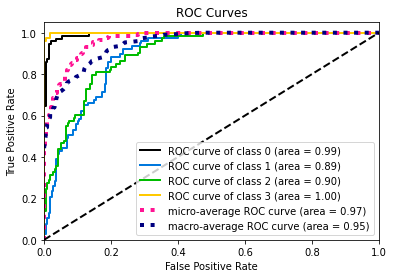

In [ ]:
skplt.metrics.plot_roc(y_test, predicted_probas)

Получили, что модель показывает accuracy примерно 0.79 на тестовой выборке. При этом, логистическая регрессия хорошо работает для наблюдений класса 0 и 3, но при этом хуже для классов 1 и 2.

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

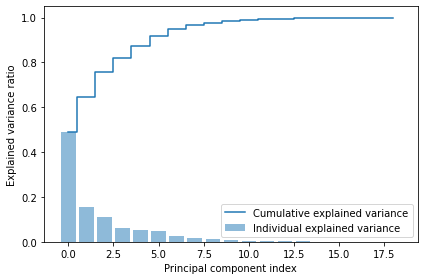

In [ ]:
pca = PCA()
#
# Determine transformed features
#
X_train_pca = pca.fit_transform(x_train_sc)
#
# Determine explained variance using explained_variance_ration_ attribute
#
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
cum_sum_eigenvalues

array([0.48953541, 0.64625907, 0.75801507, 0.81899636, 0.8717765 ,
       0.91946786, 0.94707589, 0.96527643, 0.9768707 , 0.98509099,
       0.98990127, 0.99290174, 0.99512003, 0.99706415, 0.99817902,
       0.99898027, 0.99967263, 0.99998177, 1.        ])

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

Как уже было сказано в разделе предобработки данных, мы должны обязательно отнормировать данные, чтобы применять к ним PCA, что и было сделано в предобработке.
По значениям кумулятивных сумм можно видеть, что 12 компонент объясняют 99% данных. Возьмём это число компонент.

In [ ]:
pca = PCA(n_components=12)
x_train_pca = pca.fit_transform(x_train_sc)
x_test_pca = pca.transform(x_test_sc)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [ ]:
grid={"C": np.linspace(0.1, 1, 10), "penalty":["l1","l2"]} # l1 lasso l2 ridge
logreg=LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)
logreg_cv=GridSearchCV(logreg, grid, cv=10)
logreg_cv.fit(x_train_pca, y_train)

GridSearchCV(cv=10,
             estimator=LogisticRegression(max_iter=500,
                                          multi_class='multinomial',
                                          solver='saga', tol=0.001),
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'penalty': ['l1', 'l2']})

In [ ]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.7000000000000001, 'penalty': 'l2'}
accuracy : 0.7434006734006734


In [ ]:
logreg_best = LogisticRegression(**logreg_cv.best_params_, multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)
logreg_best.fit(x_train_pca, y_train)

LogisticRegression(C=0.7000000000000001, max_iter=500,
                   multi_class='multinomial', solver='saga', tol=0.001)

In [ ]:
predicted_labels = logreg_best.predict(x_test_pca)
predicted_probas = logreg_best.predict_proba(x_test_pca)

In [ ]:
accuracy_score(y_test, predicted_labels)

0.7441077441077442

In [ ]:
f1_score(y_test, predicted_labels, average='weighted')

0.7359246122944428

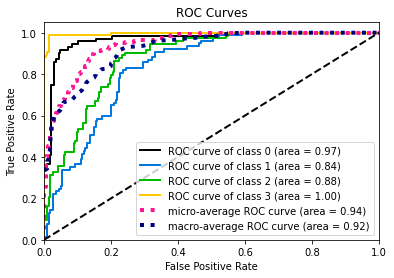

In [ ]:
skplt.metrics.plot_roc(y_test, predicted_probas)

Логистическая регрессия стала показывать результат несколько хуже, что ожидаемо, так как мы снизили размерность датасета и по сути не используем все данные, выбрав 12 компонент из 19.

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [ ]:
grid = {"max_depth": np.arange(0, 17)}
tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree, grid)
tree_cv.fit(x_train_pca, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])})

In [ ]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'max_depth': 8}
accuracy : 0.6265054211843203


In [ ]:
tree_best = DecisionTreeClassifier(**tree_cv.best_params_)
tree_best.fit(x_train_pca, y_train)

DecisionTreeClassifier(max_depth=8)

In [ ]:
predicted_labels = tree_best.predict(x_test_pca)
predicted_probas = tree_best.predict_proba(x_test_pca)

In [ ]:
accuracy_score(y_test, predicted_labels)

0.5858585858585859

In [ ]:
f1_score(y_test, predicted_labels, average='weighted')

0.5791423629319709

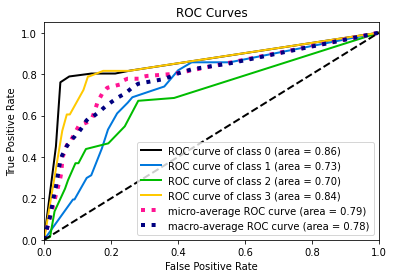

In [ ]:
skplt.metrics.plot_roc(y_test, predicted_probas)

Качество решающего дерева получилось ниже, чем логистической регрессии.

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [ ]:
accuracy_lr = []
f1_lr = []
for algs in np.arange(2, 100, 5):
  clf = BaggingClassifier(base_estimator=LogisticRegression(**logreg_cv.best_params_, 
                                                       multi_class='multinomial', 
                                                       solver='saga', tol=1e-3, 
                                                       max_iter=500), 
                          n_estimators=algs, bootstrap=True, random_state=0).fit(x_train_pca, y_train)
  preds = clf.predict(x_test_pca)
  accuracy_lr.append(accuracy_score(y_test, preds))
  f1_lr.append(f1_score(y_test, preds, average='weighted'))

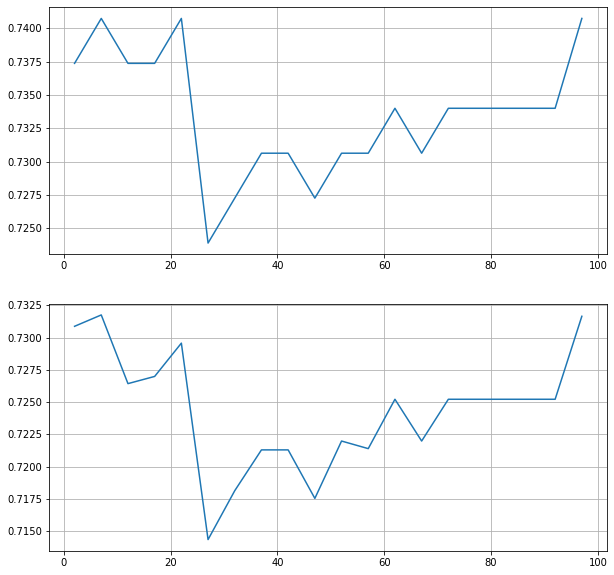

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10))

ax[0].plot(np.arange(2, 100, 5), accuracy_lr)
ax[0].grid()
ax[1].plot(np.arange(2, 100, 5), f1_lr)
ax[1].grid()

Судя по полученным графикам, наилучший результат мы получили при использовании Bagging с 6-ью логистическими регрессиями. 

In [ ]:
accuracy_dt = []
f1_dt = []
for algs in np.arange(2, 100, 5):
  clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(**tree_cv.best_params_), 
                          n_estimators=algs, bootstrap=True, random_state=0).fit(x_train_pca, y_train)
  preds = clf.predict(x_test_pca)
  accuracy_dt.append(accuracy_score(y_test, preds))
  f1_dt.append(f1_score(y_test, preds, average='weighted'))

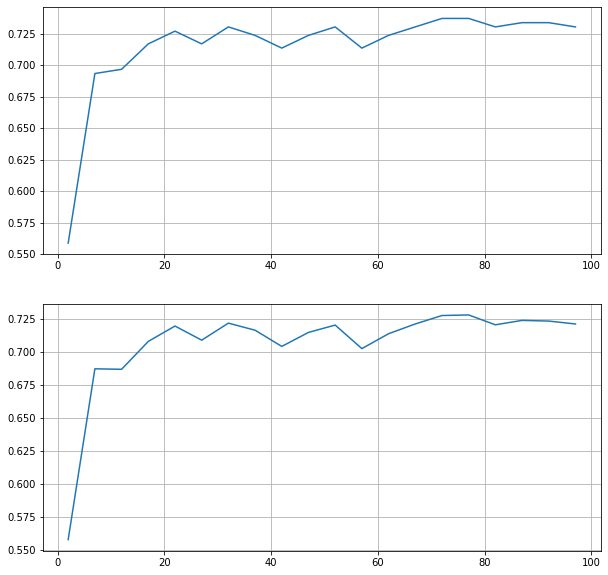

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10))

ax[0].plot(np.arange(2, 100, 5), accuracy_dt)
ax[0].grid()
ax[1].plot(np.arange(2, 100, 5), f1_dt)
ax[1].grid()

В случае решающих деревьев, наилучший результат получается при использовании 76 деревьев. При этом возможно, что лучшие параметры, которые были получены при оценке одного решающего дерева не будут являться лучшими для Bagging'а. Так, при оценке одного решающенго дерева мы получили достаточно глубокое дерево, глубиной 8. При Bagging, возможно, что оптимальнее использовать менее глубокие деревья.

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [ ]:
accuracy_rf = []
f1_rf = []
for trees in np.arange(2, 100, 5):
  clf = RandomForestClassifier(n_estimators=trees, **tree_cv.best_params_).fit(x_train_pca, y_train)
  preds = clf.predict(x_test_pca)
  accuracy_rf.append(accuracy_score(y_test, preds))
  f1_rf.append(f1_score(y_test, preds, average='weighted'))

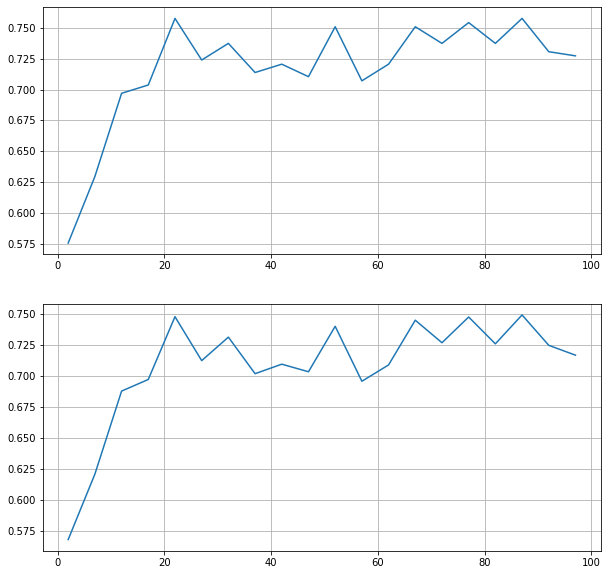

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10))

ax[0].plot(np.arange(2, 100, 5), accuracy_rf)
ax[0].grid()
ax[1].plot(np.arange(2, 100, 5), f1_rf)
ax[1].grid()

Мы получили примерно равные показатели метрик при использовании 21 и 86 деревьев в Random Forest. Это число отлично от числа алгоритмов, которые показали наилучшие результаты при Bagging'е. И при этом значения метрик выше, чем те, которые были получены при Bagging'е.

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [ ]:
skf = StratifiedKFold(n_splits=10)
train_data_splits = skf.split(x_train_pca, y_train)

split_indicies = [[]]*10
for i, (train_index, test_index) in enumerate(train_data_splits):
  split_indicies[i] = split_indicies[i-1] + list(train_index) + list(test_index)


In [ ]:
accuracy_lr_inc = []
f1_lr_inc = []
for inds in split_indicies:
  clf = LogisticRegression(**logreg_cv.best_params_, 
                           multi_class='multinomial', solver='saga', tol=1e-3, 
                           max_iter=500).fit(x_train_pca[inds], y_train[inds])
  preds = clf.predict(x_test_pca)
  accuracy_lr_inc.append(accuracy_score(y_test, preds))
  f1_lr_inc.append(f1_score(y_test, preds, average='weighted'))

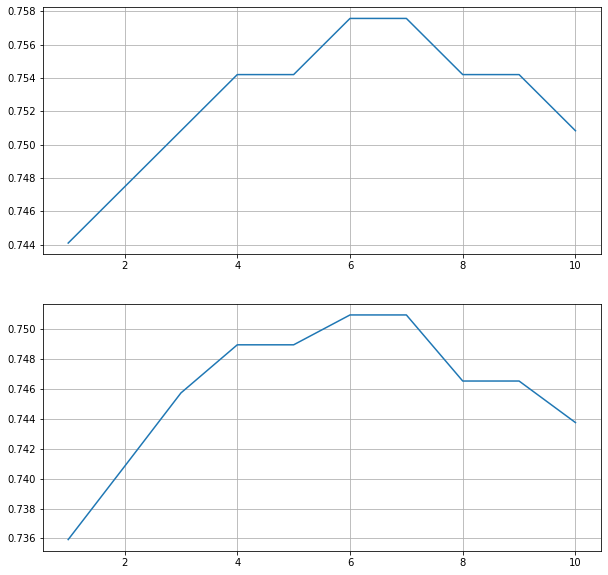

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10))

ax[0].plot(np.arange(1, len(split_indicies)+1, 1), accuracy_lr_inc)
ax[0].grid()
ax[1].plot(np.arange(1, len(split_indicies)+1, 1), f1_lr_inc)
ax[1].grid()

In [ ]:
accuracy_dt_inc = []
f1_dt_inc = []
for inds in split_indicies:
  clf = DecisionTreeClassifier(**tree_cv.best_params_).fit(x_train_pca[inds], y_train[inds])
  preds = clf.predict(x_test_pca)
  accuracy_dt_inc.append(accuracy_score(y_test, preds))
  f1_dt_inc.append(f1_score(y_test, preds, average='weighted'))

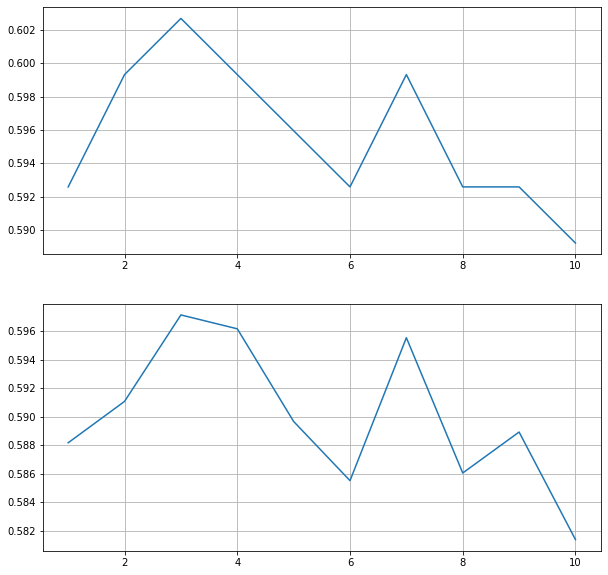

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10))

ax[0].plot(np.arange(1, len(split_indicies)+1, 1), accuracy_dt_inc)
ax[0].grid()
ax[1].plot(np.arange(1, len(split_indicies)+1, 1), f1_dt_inc)
ax[1].grid()

In [ ]:
accuracy_rf_inc = []
f1_rf_inc = []
for inds in split_indicies:
  clf = RandomForestClassifier(n_estimators=trees, **tree_cv.best_params_).fit(x_train_pca[inds], y_train[inds])
  preds = clf.predict(x_test_pca)
  accuracy_rf_inc.append(accuracy_score(y_test, preds))
  f1_rf_inc.append(f1_score(y_test, preds, average='weighted'))

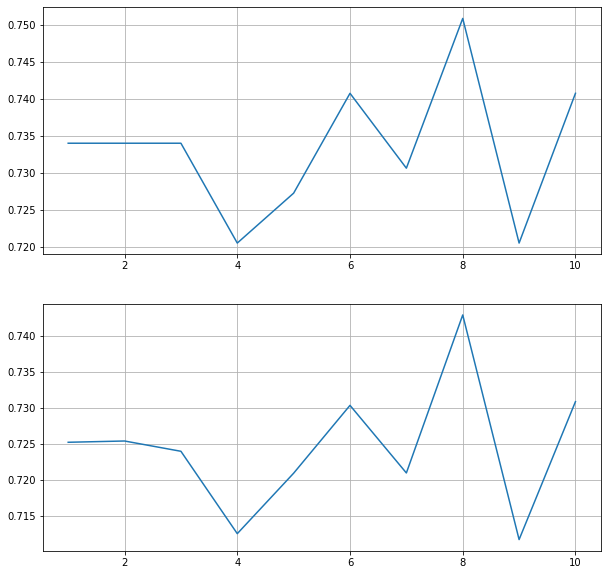

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10))

ax[0].plot(np.arange(1, len(split_indicies)+1, 1), accuracy_rf_inc)
ax[0].grid()
ax[1].plot(np.arange(1, len(split_indicies)+1, 1), f1_rf_inc)
ax[1].grid()

Можем заметить, что, например, логистическая регрессия показывает хорошие метрики на 60% данных. В целом, порядок accuracy, которую можно получить, применяя тот или иной алгоритм можно оценить и на части данных. Это можно использовать при работе с большими датасетами, чтобы не обучать несколько моделей на всех данных, а провести отбор моделей на небольшой выборке.